# Исследование надёжности заёмщиков

### Цели и задачи исследования

**Цели исследования** 
- Выяснить, какие признаки и каким образом влияют на возврат кредита заёмщиком в срок. Например, семейное положение и количество детей клиента. 
- На основании найденных закономерностей дать рекомендации по построению модели кредитного скоринга, которая оценивает способность потенциального заёмщика вернуть кредит банку.

**Задачи исследования** 

Для достижения целей исследования нужно найти ответы на поставленные вопросы:
- Есть ли зависимость между количеством детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

**Описание данных**

Входные данные - статистика о платёжеспособности клиентов банка. В таблице для каждого заёмщика представлены следующие данные:
- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита


### Импорты

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт модуля pyplot из библиотеки matplotlib
from  matplotlib import pyplot as plt

### Настройки

In [2]:
# задаём более крупный размер шрифта на графиках
plt.rcParams['font.size'] = 12

## Предварительное изучение данных

### Получение данных

In [3]:
# получение таблицы из CSV файла
try:
    # файл на платформе
    data = pd.read_csv('/datasets/data.csv')
except:  
    # файл на сервере
    data = pd.read_csv('https://<LINK_REMOVED>/datasets/data.csv')

### Знакомство с данными

Посмотрим на полученную таблицу.

In [4]:
# первые 20 строк таблицы
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Данные в таблице в целом соответствуют описанию.

### Общая информация о данных

In [5]:
# основная информация о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Наблюдения:**
- Обнаружены пропущенные значения в столбцах `days_employed` и `total_income`.
- Столбцы `days_employed` и `total_income` по логике должны содержать целочисленные значения, однако в таблице имеют вещественный тип `float64`. Возможно, понадобится преобразование типа.

### Поиск аномалий в данных

Для каждого столбца таблицы подсчитаем количество уникальных значений в данном столбце.

In [6]:
# количество уникальных значений в столбцах таблицы с учётом пропусков
data.nunique(dropna=False)

children                8
days_employed       19352
dob_years              58
education              15
education_id            5
family_status           5
family_status_id        5
gender                  3
income_type             8
debt                    2
total_income        19352
purpose                38
dtype: int64

Составим список столбцов, количество уникальных значений в которых невелико. Это все столбцы, кроме `days_employed` и`total_income`.

In [7]:
# список выбранных столбцов
selected_columns = data.columns.drop(['days_employed', 'total_income'])
selected_columns

Index(['children', 'dob_years', 'education', 'education_id', 'family_status',
       'family_status_id', 'gender', 'income_type', 'debt', 'purpose'],
      dtype='object')

Для каждого столбца из списка получим отсортированный перечень уникальных значений в данном столбце.

In [8]:
for col in selected_columns:
    print(f'Уникальные значения в столбце {col}:\n{data[col].sort_values().unique().tolist()}')
    print()

Уникальные значения в столбце children:
[-1, 0, 1, 2, 3, 4, 5, 20]

Уникальные значения в столбце dob_years:
[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]

Уникальные значения в столбце education:
['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее', 'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']

Уникальные значения в столбце education_id:
[0, 1, 2, 3, 4]

Уникальные значения в столбце family_status:
['Не женат / не замужем', 'в разводе', 'вдовец / вдова', 'гражданский брак', 'женат / замужем']

Уникальные значения в столбце family_status_id:
[0, 1, 2, 3, 4]

Уникальные значения в столбце gender:
['F', 'M', 'XNA']

Уникальные значения в столбце income_type:
['безработный', 'в дек

Столбцы `days_employed` и `total_income` содержат количественные значения, поэтому число уникальных значений в них слишком велико для непосредственного анализа. Поэтому для поиска аномалий в этих столбцах посмотрим на характерные значения в них.

In [9]:
# считаем минимальное, максимальное, среднее и медианное значение в столбцах
data[['days_employed', 'total_income']].agg(['min', 'max', 'mean', 'median'])

,days_employed,total_income
min,-18388.949901,2.066726e+04
max,401755.400475,2.265604e+06
mean,63046.497661,1.674223e+05
median,-1203.369529,1.450179e+05


В столбце `days_employed` присутствуют отрицательные значения, которые не отражают действительность и появились из-за какой-то технической ошибки.

### Выводы

В результате предварительного изучения данных обнаружены пропуски и аномалии:
- Пропущенные значения в столбцах `days_employed` и `total_income`.
- Несоответствие типа данных в столбцах `days_employed` и `total_income` (вещественный вместо ожидаемого целочисленного).
- Аномальные отрицательные значения в столбце `days_employed`.
- Аномальные значения `-1` и `20` в столбце `children`.
- Неявные пропуски (аномальное значение `0`) в столбце `dob_years`.
- Неявные пропуски (плейсхолдер `'XNA'`) в столбце `gender`.
- Неявные дубликаты в столбце `education`, различающиеся регистром букв.

## Предобработка данных

### Обработка аномалий

#### `days_employed`

В столбце `days_employed` присутствуют отрицательные значения, которые не отражают действительность. Можно предположить, что значения стажа были вычислены как разность моментов времени начала ($t_1$) и окончания ($t_2$) периода, когда клиент был трудоустроен:
$$ \Delta t = t_2 - t_1 $$
Поэтому возможная причина появления отрицательных значений - ошибка в порядке ввода значений $t_1$ и $t_2$ в форму при её заполнении данными, предоставленными клиентом.

Дополнительно исследуем значения трудового стажа в зависимости от категории клиентов. Наиболее значимым признаком для категоризации в этом случае будет тип занятости клиента. Поэтому найдём диапазон изменения и медианное значение трудового стажа для каждого типа занятости.

In [10]:
# сгруппируем данные по столбцу income_type и рассчитаем минимальное, максимальное и медианное 
# значение в столбце days_employed для каждой группы
data.groupby('income_type')['days_employed'].agg(['min', 'max', 'median'])

,min,max,median
income_type,,,
безработный,337524.466835,395302.838654,366413.652744
в декрете,-3296.759962,-3296.759962,-3296.759962
госслужащий,-15193.032201,-39.954170,-2689.368353
компаньон,-17615.563266,-30.195337,-1547.382223
пенсионер,328728.720605,401755.400475,365213.306266
предприниматель,-520.848083,-520.848083,-520.848083
сотрудник,-18388.949901,-24.141633,-1574.202821
студент,-578.751554,-578.751554,-578.751554


Оказывается, что значения трудового стажа положительные только для двух категорий клиентов (безработные и пенсионеры), а для всех других категорий отрицательные. Это указывает на обоснованность высказанного ранее предположения о причине появления отрицательных значений. В этом случае можно устранить аномалии в данных, взяв имеющиеся значения по модулю.

При этом для безработных и пенсионеров получаются аномально большие значения стажа: 401755 дней соответствует 1100 лет. Можно предположить, что имеет место техническая ошибка. Как исправлять такие значения, непонятно, поэтому оставим как есть.

Заменим все отрицательные значения в столбце `days_employed` на положительные, равные по абсолютной величине.

In [11]:
# заменяем отрицательные значения на их абсолютную величину
data['days_employed'] = data['days_employed'].abs()

Проверим диапазон и медианные значения по категориям в столбце после замены.

In [12]:
# проверяем диапазон значений после замены
data['days_employed'].agg(['min', 'max'])

min        24.141633
max    401755.400475
Name: days_employed, dtype: float64

In [13]:
# сгруппируем данные по столбцу income_type и рассчитаем медианное значение в столбце days_employed
# для каждой группы
data.groupby('income_type')['days_employed'].median()

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

**Вывод:** Аномальные отрицательные значения в столбце `days_employed` устранены. Теперь в столбце только положительные значения. Однако для двух категорий клиентов (безработные и пенсионеры) значения трудового стажа аномально большие и поэтому недостоверные. Это нужно учитывать при дальнейшей работе с данными.

#### `children`

Выведем ещё раз перечень уникальных значений в столбце `children` (количество детей у клиента).

In [14]:
# уникальные значения в столбце children
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

В столбце `children` есть два аномальных значения: `-1` и `20`. 

Если предположить, что появление аномальных значений связано с человеческим фактором (опечатки при вводе числа), то кажется странным отсутствие значений `10` и `-2`. Поэтому возможные причины появления аномальных значений в столбце `children` скорее технические. Например, это могут быть значение по умолчанию для незаполненного поля ввода и значение, указывающее на ошибку при вводе данных. 

Найдём количество каждого из уникальных значений в столбце.

In [15]:
# количество появлений каждого уникального значения в столбце children
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Оценим долю аномальных значений в столбце.

In [16]:
# суммарная доля значений -1 и 20 в столбце children (в процентах)
print('Доля значений -1 и 20: '
      f"{data.loc[data['children'].isin([-1, 20]), 'children'].count() / len(data):.2%}")

Доля значений -1 и 20: 0.57%


Доля аномальных значений в выборке мала (< 1 %). Как их исправлять такие аномальные значения, непонятно. Поэтому удалим из таблицы строки, в которых они встречаются.

In [17]:
# удаляем из таблицы строки, в которых значение в столбце children равно -1 или 20
data = data[~(data['children'].isin([-1, 20]))]

Проверим результат удаления строк с аномалиями.

In [18]:
# уникальные значения в столбце children
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

**Вывод:** Строки с аномальными значениями в столбце `children` удалены.

#### `dob_years`

В столбце `dob_years` есть аномальное значение `0`. Скорее всего, это значение по умолчанию для незаполненного поля, а причина его появления - не была введена дата рождения клиента (DOB = date of birth), по которой был рассчитан возраст. Таким образом, данную аномалию можно также рассматривать как неявный пропуск в данных. Чтобы попытаться установить причину, по которой отсутствуют сведения о возрасте клиентов, посмотрим на цели получения кредита у таких клиентов.

In [19]:
# первые 15 записей в столбце purpose для клиентов, возраст которых равен 0
data.loc[data['dob_years'] == 0, 'purpose'].head(15)

99                                  автомобиль
149                          операции с жильем
270                               ремонт жилью
578     строительство собственной недвижимости
1040                           свой автомобиль
1149                      покупка недвижимости
1175     получение дополнительного образования
1386                      сделка с автомобилем
1890                                     жилье
1898                     на покупку автомобиля
2082                  операции с недвижимостью
2284                              недвижимость
2469                           сыграть свадьбу
2487                              недвижимость
2870              на покупку своего автомобиля
Name: purpose, dtype: object

Как видно, присутствуют и покупка недвижимости, и покупка автомобиля. Маловероятно, что такие кредиты выдают без предоставления паспортных данных, поэтому причиной появления рассматриваемых неявных пропусков, скорее всего, является техническая ошибка.

Оценим долю пропущенных значений (нулей).

In [20]:
# суммарная доля значения 0 в столбце dob_years (в процентах)
print('Доля значения 0: '
      f"{data.loc[data['dob_years'] == 0, 'dob_years'].count() / len(data):.2%}")

Доля значения 0: 0.47%


Доля пропущенных значений (нулей) мала (< 1 %). Их можно устранить, заполнив характерным значением. В качестве такого характерного значения можно выбрать среднее либо медиану. Посмотрим, велико ли отличие между ними.

In [21]:
# среднее и медианное значение в столбце dob_years, за исключением строк, в которых значение равно 0
data.loc[data['dob_years'] != 0, 'dob_years'].agg(['mean', 'median'])

mean      43.503474
median    43.000000
Name: dob_years, dtype: float64

Разница между средним и медианой менее 1. Принимая во внимание, что в столбце `dob_years` содержатся целочисленные значения, для заполнения пропусков лучше выбрать медиану.

Заполним пропуски в столбце `dob_years` медианным значением.

In [22]:
# заменяем значение в столбце dob_years для строк, в которых оно равно 0, 
# на медиа по всем строкам, в которых оно не равно 0, медиану приводим к типу int
data.loc[data['dob_years'] == 0, 'dob_years'] = \
    int(data.loc[data['dob_years'] != 0, 'dob_years'].median())

Проверим результат замены, определив диапазон значений в столбце.

In [23]:
data['dob_years'].agg(['min', 'max'])

min    19
max    75
Name: dob_years, dtype: int64

**Вывод:** Неявные пропуски в столбце `dob_years` заполнены медианным значением по выборке.

#### `gender`

В столбце `gender` было обнаружено аномальное значение  - плейсхолдер `'XNA'`. Это тоже неявный пропуск. Оценим, насколько значительно их количество, подсчитав число уникальных значений в столбце.

In [24]:
# количество появлений каждого уникального значения в столбце gender
data['gender'].value_counts()

F      14154
M       7247
XNA        1
Name: gender, dtype: int64

Пол не указан только в одной строке таблицы. Посмотрим на эту строку.

In [25]:
# строки таблицы, в которых в столбце gender значение XNA
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


Вероятная причина появления этого неявного пропуска - ошибка при вводе данных, связанная с человеческим фактором. В данных присутствуют сведения о семейном положении и занятости, поэтому версию о том, что пол клиента был неизвестен, можно исключить.

Попытаемся восстановить пропущенное значение на основе других значений в других столбцах. 

Проверим, можно ли для этого использовать данные в столбцах `income_type`, `family_status_id` или их сочетании. Для этого посчитаем количество различных значений в столбце `gender` для таких же значений в столбцах `income_type` и `family_status_id`, как в рассматриваемой строке с неявным пропуском.

In [26]:
# количество появлений каждого уникального значения в столбце gender
# при условии, что в столбце income_type значение 'компаньон'
data.loc[data['income_type'] == 'компаньон', 'gender'].value_counts()

F      3179
M      1874
XNA       1
Name: gender, dtype: int64

In [27]:
# количество появлений каждого уникального значения в столбце gender
# при условии, что в столбце family_status_id значение 1
data.loc[data['family_status_id'] == 1, 'gender'].value_counts()

F      2855
M      1304
XNA       1
Name: gender, dtype: int64

In [28]:
# количество появлений каждого уникального значения в столбце gender
# при условии, что в столбце income_type значение 'компаньон'
# и в столбце family_status_id значение 1
data.loc[
    (data["income_type"] == "компаньон") & (data["family_status_id"] == 1), "gender"
].value_counts()

F      665
M      345
XNA      1
Name: gender, dtype: int64

**Вывод:** Соотношение значений во всех трёх случаях соответствует общему по выборке. Поэтому восстановить пропущенное значение не получится. Оставим его как есть.

### Обработка дубликатов

**Примечание:** Обработку дубликатов в данных кажется предпочтительнее провести перед обработкой пропусков, потому что наличие явных дубликатов записей в таблице (строк-дубликатов) может исказить статистические характеристики распределения количественных переменных. В результате при заполнении пропусков в количественных переменных характерными значениями по выборке эти характерные значения могут оказаться смещены относительно своих значений по выборке, очищенной от дубликатов.

#### Устранение неявных дубликатов

Выведем ещё раз перечень уникальных значений уровня образования клиента в столбце `education`.

In [29]:
# уникальные значения в столбце education
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

Среди значений присутствуют неявные дубликаты, различающиеся регистром букв. Причина их появления - человеческий фактор. Вероятно, значения не выбирались из списка заранее заданных, а вводились вручную в текстовое поле ввода. 

Для устранения неявных дубликатов приведём все строковые значения к нижнему регистру.

In [30]:
# приводим строки в столбце education к нижнему регистру
data['education'] = data['education'].str.lower()

Проверим результат преобразования.

In [31]:
# уникальные значения в столбце education
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Дополнительно убедимся, что каждое уникальное значение в столбце `education` соответствует единственному значению в столбце `education_id`.

In [32]:
# группируем данные по столбцу education и проверяем, что количество уникальных значений 
# в столбце education_id для каждой группы равно 1
(data.groupby('education')['education_id'].nunique() == 1).all()

True

**Вывод:** Неявные дубликаты в столбце `education` устранены. Для устранения неявных дубликатов строковых значений был использован метод их приведения их к нижнему регистру.

#### Удаление полных дубликатов

Найдём количество полных дубликатов строк таблицы.

In [33]:
# подсчёт строк-дубликатов
data.duplicated().sum()

71

Возможная причина появления в таблице строк-дубликатов - повторное внесение идентичных записей в базу данных.

При предварительном изучении данных было обнаружено, что в столбцах `days_employed` и `total_income` имеются пропущенные значения. Проверим две гипотезы: 1) во всех строках-дубликатах есть пропуски в данных столбцах, 2) все строки с пропусками в данных столбцах - дубликаты неких строк, в том числе, возможно, без пропусков в данных столбцах.

In [34]:
# проверяем, что в столбце days_employed во всех повторяющихся строках пропуск
data.loc[data.duplicated(keep=False), 'days_employed'].isna().all()

True

In [35]:
# проверяем, что все номера строк, в которых в столбце days_employed пропуск, содержатся в списке
# номеров повторяющихся строк в таблице, из которой исключены столбцы с пропусками
data[data['days_employed'].isna()].index.isin(data[data.dropna(axis=1).duplicated(keep=False)].index).all()

False

Из двух гипотез подтвердилась только первая. Получается, что во всех строках-дубликатах есть пропуски в столбце `days_employed`. Как будет показано далее, пропуски в столбцах `days_employed` и `total_income` присутствуют в одних и тех же строках. Это важная информация, потому что при удалении строк-дубликатов количество пропусков в данных уменьшится.

Удалим из таблицы строки-дубликаты.

In [36]:
# удаление строк-дубликатов
data = data.drop_duplicates()

Проверим результат удаления дубликатов.

In [37]:
# подсчёт строк-дубликатов
data.duplicated().sum()

0

**Вывод:** Строки-дубликаты в таблице удалены. Они не несут полезной информации, а только могут исказить результаты анализа данных.

### Обработка пропущенных значений

#### Обнаружение пропущенных значений

Посчитаем количество пропущенных значений в каждом столбце таблицы.

In [38]:
# количество пропущенных значений в каждом столбце
data.isna().sum()

children               0
days_employed       2091
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2091
purpose                0
dtype: int64

Пропущенные значения имеются в столбцах `days_employed` и `total_income`, причём количество пропусков в них одинаковое.

Выясним, какие это пропущенные значения.

In [39]:
# уникальные пропущенные значения в столбце days_employed
data.loc[data['days_employed'].isna(), 'days_employed'].unique()

array([nan])

In [40]:
# уникальные пропущенные значения в столбце total_income
data.loc[data['total_income'].isna(), 'total_income'].unique()

array([nan])

Как и следовало ожидать, в обоих столбцах, имеющих тип `float64`, пропуски представляют собой значение `NaN`.

Посмотрим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками.

In [41]:
# подсчёт доли пропущенных значений в каждом столбце (в процентах)
data.isna().sum() / len(data) * 100

children            0.000000
days_employed       9.802635
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        9.802635
purpose             0.000000
dtype: float64

Доля пропусков в столбцах `days_employed` и `total_income` одинакова и составляет около 10 %.

Проверим гипотезу, что пропуски в этих двух столбцах присутствуют в одних и тех же строках таблицы.

In [42]:
# проверяем, что номера строк с пропусками в столбцах days_employed и total_income совпадают
(data[data['days_employed'].isna()].index == data[data['total_income'].isna()].index).all()

True

Гипотеза подтвердилась: пропуски в столбцах `days_employed` и `total_income` присутствуют в одних и тех же строках таблицы.

Далее проверим гипотезу, что пропуски в столбцах `days_employed` и `total_income` связаны с тем, что клиент не имеет дохода и трудового стажа. Для этого определим тип занятости таких клиентов.

In [43]:
# уникальные значения в столбце income_type при условии пропуска в столбце days_employed
data.loc[data['days_employed'].isna(), 'income_type'].unique()

array(['пенсионер', 'госслужащий', 'компаньон', 'сотрудник',
       'предприниматель'], dtype=object)

Гипотеза не подтвердилась: пропуски есть и для трудоустроенных клиентов (сотрудники, госслужащие, предприниматели).

**Вывод:** Возможная причина появления пропусков в столбцах `days_employed` и `total_income` - клиент не предоставил информацию о занятости и доходе.

#### Заполнение пропущенных значений в столбцах `total_income` и `days_employed`

Пропуски в количественных переменных можно заполнять характерными значениями по выборке, если доля пропусков не очень велика, в противном случае это приведёт к сильному искажению статистики. Как было показано ранее, доля пропусков в столбцах `total_income` и `days_employed` одинакова и составляет около 10 %. Поэтому заполнение пропусков в данном случае допустимо.

Пропуски в столбцах `days_employed` и `total_income`  присутствуют в одних и тех же строках таблицы:

In [44]:
# проверяем, что в исходной таблице номера строк с пропусками 
#в столбцах days_employed и total_income совпадают
(data[data['days_employed'].isna()].index == 
 data[data['total_income'].isna()].index
).all()

True

Отсутствие сведений о занятости и доходе в одних и тех же строках таблицы означает, что клиент не предоставил соответствующую информацию, например, справку с места работы.

Оценим характер распределения значений в столбце `total_income`. Для этого разобьём диапазон значений на 10 интервалов и подсчитаем количество значений в каждом из них.

In [45]:
# разбиваем диапазон на 10 интервалов и считаем количество значений в каждом
data['total_income'].groupby(pd.cut(data['total_income'], bins=10), observed=False).count()


total_income
(18422.327, 245160.94]        16302
(245160.94, 469654.617]        2652
(469654.617, 694148.293]        223
(694148.293, 918641.97]          34
(918641.97, 1143135.646]         15
(1143135.646, 1367629.323]        6
(1367629.323, 1592122.999]        2
(1592122.999, 1816616.676]        4
(1816616.676, 2041110.352]        0
(2041110.352, 2265604.029]        2
Name: total_income, dtype: int64

Видно, что в столбце `total_income` присутствуют значения, намного превышающие большинство.

**Заполнение пропусков медианным значением — лучшее решение для количественных переменных при наличии выбросов.** Когда некоторые значения сильно выделяются на фоне большинства, заполнять пропуски в значениях количественных переменных лучше медианным значением, а не средним, потому что среднее значение в таком случае некорректно характеризует данные. 

На сумму дохода сильно влияет тип занятости, поэтому заполним пропущенные значения дохода в столбце `total_income` медианным значением для данного типа занятости из столбца `income_type`.

In [46]:
for income_type in data['income_type'].unique():
    data.loc[(data['income_type'] == income_type) & (data['total_income'].isna()), 'total_income'] = \
        data.loc[data['income_type'] == income_type, 'total_income'].median()

Аналогично, оценим характер распределения значений в столбце `days_employed`. Для этого разобьём диапазон значений на 10 интервалов и подсчитаем количество значений в каждом из них. 

In [47]:
# разбиваем диапазон на 10 интервалов и считаем количество значений в каждом
data['days_employed'].groupby(pd.cut(data['days_employed'], bins=10), observed=False).count()

days_employed
(-377.59, 40197.268]        15809
(40197.268, 80370.393]          0
(80370.393, 120543.519]         0
(120543.519, 160716.645]        0
(160716.645, 200889.771]        0
(200889.771, 241062.897]        0
(241062.897, 281236.023]        0
(281236.023, 321409.149]        0
(321409.149, 361582.275]     1551
(361582.275, 401755.4]       1880
Name: days_employed, dtype: int64

Здесь ситуация ещё хуже, значения группируются по краям диапазона.

Как было обнаружено ранее, для двух категорий клиентов (безработные и пенсионеры) значения в столбце `days_employed` аномально велики. Поэтому имеет смысл повторить оценку распределения без учёта этих двух категорий.

In [48]:
# разбиваем диапазон на 10 интервалов и считаем количество значений в каждом,
# исключая строки, в которых income_type 'безработный' или 'пенсионер'
data_ex = data[~(data['income_type'].isin(['безработный', 'пенсионер']))]
data_ex['days_employed'].groupby(pd.cut(data_ex['days_employed'], bins=10), observed=False).count()

days_employed
(5.777, 1860.622]         8683
(1860.622, 3697.103]      4060
(3697.103, 5533.584]      1677
(5533.584, 7370.065]       650
(7370.065, 9206.546]       376
(9206.546, 11043.027]      194
(11043.027, 12879.507]     110
(12879.507, 14715.988]      44
(14715.988, 16552.469]      12
(16552.469, 18388.95]        3
Name: days_employed, dtype: int64

Распределение значений в столбце `total_income` несимметрично, поэтому здесь также правильнее будет для заполнения пропусков использовать медианное значение.

Для каждого типа занятости из столбца `income_type` заполним пропущенные значения трудового стажа в столбце `days_employed` медианным значением для данного типа занятости.

In [49]:
for income_type in data['income_type'].unique():
    data.loc[(data['income_type'] == income_type) & (data['days_employed'].isna()), 'days_employed'] = \
        data.loc[data['income_type'] == income_type, 'days_employed'].median()

Убедимся, что все пропуски заполнены.

In [ ]:
# подсчёт количества пропущенных значений в каждом столбце
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

**Вывод:** Пропуски в столбцах `total_income` и `days_employed` были заполнены медианными значениями по категориям типа занятости из столбца `income_type`, выбранным по принципу наибольшего влияния на значения в данных столбцах. В результате все явные пропуски в данных устранены. 

#### Возможные причины появления пропусков в исходных данных

В общем случае пропуски в исходных данных могут возникать вследствие различных причин:
- ошибок технологического характера или связанных с человеческим фактором,
- отсутствием определённого признака у объекта,
- неполнотой или отсутствием информации об объекте.

В данном исследовании пропущенные значения имелись в столбцах `days_employed` и `total_income`. Кроме того, имелись неявные пропуски в столбце `dob_years` (аномальное значение `0`) и `gender` (плейсхолдер `'XNA'`).
- Возможная причина появления пропусков в столбцах `days_employed` и `total_income` - клиент не предоставил информацию о занятости и доходе.
- Возможная причина появления неявных пропусков в столбце `dob_years` (значение `0`) - техническая ошибка при вводе данных.
- Возможная причина появления неявного пропуска в столбце `gender` (плейсхолдер `'XNA'`) - техническая ошибка при вводе данных.

### Изменение типов данных

Рассмотрим типы данных в столбцах таблицы.

In [51]:
# перечень столбцов таблицы и их тип
data.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

Заменим вещественный тип данных в столбцах `days_employed` и `total_income` на целочисленный.

In [52]:
# изменяем тип данных в столбце days_employed на int
data['days_employed'] = data['days_employed'].astype(int)

In [53]:
# изменяем тип данных в столбце total_income на int
data['total_income'] = data['total_income'].astype(int)

Проверим результат преобразования типа данных.

In [54]:
# перечень столбцов таблицы и их тип
data.dtypes

children             int64
days_employed        int64
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int64
purpose             object
dtype: object

**Вывод:** Тип данных в столбцах `days_employed` и `total_income` на целочисленный `int64`, который соответствует характеру значений в данных столбцах.

### Категоризация данных

#### Категоризация по уровню дохода

Разделим клиентов на категории по уровню их ежемесячного дохода:

| Сумма дохода | Категория |
|--------------|-----------|
| 0 - 30000        | E  |
| 30001 - 50000    | D  |
| 50001 - 200000   | C  |
| 200001 - 1000000 | B  |
|  > 1000000       | A  |



Для категоризации клиентов по уровню дохода используем созданную далее функцию `categorize_income()`.

In [55]:
def categorize_income(income):
    """
    Возвращает категорию клиента по уровню его дохода
    с обработкой ошибок в случае некорректного типа аргумента.
    """
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif income <= 50000:
            return 'D'
        elif income <= 200000:
            return 'C'
        elif income <= 1000000:
            return 'B'
        elif income > 1000000:
            return 'A'
        else:
            return None
    except:
        return None

Создадим в таблице новый столбец `total_income_category` с категориями клиентов по уровню дохода.

In [56]:
# применяем к столбцу total_income функцию categorize_income
data['total_income_category'] = data['total_income'].apply(categorize_income)

Посмотрим на получившуюся таблицу.

In [57]:
# первые 5 строк таблицы
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C


#### Категоризация по цели получения кредита

Выведем ещё раз перечень уникальных значений цели получения кредита.

In [58]:
# уникальные значения в столбце purpose
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

В списке фигурируют цели, связанные с недвижимостью (жильём), автомобилем, образованием и свадьбой. Поэтому целесообразно сгруппировать похожие цели в 4 категории:
- операции с автомобилем,
- операции с недвижимостью,
- проведение свадьбы,
- получение образования.

Для категоризации клиентов по цели получения кредита используем созданную далее функцию `categorize_purpose()`.

In [59]:
def categorize_purpose(purpose):
    """
    Возвращает категорию клиента по цели получения кредита
    с обработкой ошибок в случае некорректного типа аргумента.
    """
    try:
        # приводим строку к нижнему регистру (на всякий случай)
        purpose = purpose.lower() 
        # добавляем пробел в начало строк, чтобы найти только совпадение с началом слова
        if ' автомобил' in ' ' + purpose:
            return 'операции с автомобилем'
        elif ' жиль' in ' ' + purpose or 'недвижимост' in ' ' + purpose:
            return 'операции с недвижимостью'
        elif ' свад' in purpose:
            return 'проведение свадьбы'
        elif ' образовани' in purpose:
            return 'получение образования'
        else:
            return 'нет категории'
    except:
        return None

Проверим правильность работы функции `categorize_purpose()`.

In [60]:
# для каждого уникального значения в столбце purpose определяем категорию
for purpose in data['purpose'].unique().tolist():
    print(f'{str(purpose):40} => {categorize_purpose(purpose)}')

покупка жилья                            => операции с недвижимостью
приобретение автомобиля                  => операции с автомобилем
дополнительное образование               => получение образования
сыграть свадьбу                          => проведение свадьбы
операции с жильем                        => операции с недвижимостью
образование                              => нет категории
на проведение свадьбы                    => проведение свадьбы
покупка жилья для семьи                  => операции с недвижимостью
покупка недвижимости                     => операции с недвижимостью
покупка коммерческой недвижимости        => операции с недвижимостью
покупка жилой недвижимости               => операции с недвижимостью
строительство собственной недвижимости   => операции с недвижимостью
недвижимость                             => операции с недвижимостью
строительство недвижимости               => операции с недвижимостью
на покупку подержанного автомобиля       => операции с автомоб

Создадим в таблице новый столбец `purpose_category` с категориями клиентов по цели получения кредита.

In [61]:
# применяем к столбцу purpose функцию categorize_purpose
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Посмотрим на получившуюся таблицу.

In [62]:
# первые 5 строк таблицы
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Дополнительно убедимся, что каждое уникальное значение в столбце `family_status` соответствует единственному значению в столбце `family_status_id`.

In [63]:
# группируем данные по столбцу family_status_id и проверяем, что количество уникальных значений 
# в столбце family_status для каждой группы равно 1
(data.groupby('family_status_id')['family_status'].nunique() == 1).all()

True

### Декомпозиция таблицы

Создадим две новых таблицы-справочника:
- с данными об уровне образования (столбцы `education_id` и `education`),
- с данными о семейном положении (столбцы `family_status_id` и `family_status`).

Затем удалим строки дубликаты из таблиц-справочников и обновим индексацию строк.

In [64]:
# выбираем нужные столбцы, затем удаляем строки-дубликаты с заменой индекса
education_dict = data[['education_id', 'education']].drop_duplicates(ignore_index=True)
family_status_dict = data[['family_status_id', 'family_status']].drop_duplicates(ignore_index=True)

Посмотрим на созданные таблицы-справочники.

In [65]:
display(education_dict)
family_status_dict

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,Не женат / не замужем


Для единообразия данных приведём все строки в столбце `family_status` таблицы `family_status_dict` к нижнему регистру.

In [66]:
family_status_dict['family_status'] = family_status_dict['family_status'].str.lower()

Для экономии памяти при хранении данных можно было бы удалить из исходной таблицы столбцы `education` и `family_status`. В основной таблице останутся однозначно соответствующие им столбцы-идентификаторы `education_id` и `family_status_id`. Но эти данные понадобятся далее, поэтому удалять их не будем.

In [67]:
#data = data.drop(['education', 'family_status'], axis=1)

Посмотрим на получившуюся таблицу.

In [68]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Выводы
В результате предобработки данные подготовлены для анализа:
1. Устранены проблемы, выявленные на этапе предварительного изучения данных:
   - Устранены аномальные отрицательные значения трудового стажа в столбце `days_employed`. Однако для двух категорий клиентов (безработные и пенсионеры) значения стажа аномально большие и поэтому недостоверные. Это нужно учитывать при дальнейшей работе с данными.
   - Удалены строки с аномальными значениями количества детей в столбце `children`.
   - Удалены строки-дубликаты в таблице. Они не несут полезной информации.
   - Устранены неявные дубликаты  значений уровня образования в столбце `education`. Для устранения неявных дубликатов строковых значений использован метод их приведения их к нижнему регистру.
   - Устранены пропуски значений трудового стажа в столбце `days_employed` и значений ежемесячного дохода в столбце `total_income`. Пропуски заполнены медианными значениями по категориям типа занятости из столбца `income_type`, выбранным по принципу наибольшего влияния на значения в данных столбцах.
   - Неявные пропуски (значение `0`) значений возраста в столбце `dob_years` заполнены медианным значением по выборке.
   - Неявный пропуск значения пола в столбце `gender` (значение `'XNA'`) в одной строке таблицы оставлен как есть.
   - Тип данных в столбце `total_income`  и `days_employed` изменён на целочисленный `int64`, который соответствует характеру значений в данных столбцах.

     
2. Выполнена категоризация клиентов по уровню дохода и по цели получения кредита:
   - По уровню дохода клиенты разделены на 5 категорий (A, B, C, D, E) по убыванию ежемесячного дохода.
   - По цели получения кредита клиенты разделены на 4 категории: операции с автомобилем, операции с недвижимостью, проведение свадьбы, получение образования.

3. Выполнена декомпозиция таблицы с данными. Описание уровня образования (столбец `education`) и семейного положения (столбец `family_status`) выделены в отдельные таблицы-справочники, чтобы оптимизировать хранение информации об этих категориях. 

## Анализ данных

### Оцениваемая метрика

В соответствии с целями исследования, требуется выяснить влияние различных признаков, характеризующих заёмщика, на возврат кредита в срок.

**Оцениваемая метрика** - показатель влияния заданного признака на возврат кредита в срок, равный отношению вероятности невозврата кредита в срок для рассматриваемой группы к вероятности невозврата кредита в срок в среднем по всей выборке. Назовем его "*показатель невозврата кредита в срок*", или для краткости "*показатель невозврата*". Вероятность невозврата кредита в срок равна доле клиентов, у которых была задолженность по возврату кредита. Для её расчёта нужно найти среднее значение в столбце `debt` по рассматриваемой группе. 

Таким образом, введённая метрика показывает, во сколько раз вероятность невозврата кредита в срок для рассматриваемой группы больше средней по всей выборке.

Выбор в качестве основы метрики вероятности невозврата кредита вместо вероятности его возврата обусловлен тем, что для поиска закономерностей удобнее сравнивать величины, сильнее отличающиеся по относительной величине. Например, отношение вероятностей невозврата 2 % и 4 % сравнивать удобнее, чем отношение вероятностей возврата 98 % и 96 %.

Значение метрики больше 1 означает, что для данной группы заёмщиков вероятность невозврата кредита в срок больше средней по выборке, а значит значение признака, характерное для этой группы, оказывает отрицательное влияние на возврат кредита в срок.

Соответственно, значение метрики меньше 1 означает, что для данной группы заёмщиков вероятность невозврата кредита в срок меньше средней по выборке, а значит значение признака, характерное для этой группы, оказывает положительное влияние на возврат кредита в срок.

### Методика анализа

Сравнение значений метрики $\text{debt}\_\text{factor}$ (показателя невозврата кредита в срок) производится с учётом погрешности, $\Delta(\text{debt}\_\text{factor})$, которая рассчитывается по формуле 
$$\frac{\Delta(\text{debt}\_\text{factor})}{\text{debt}\_\text{factor}} = \frac{\Delta(\text{mean}\_\text{subset})}{\text{mean}\_\text{subset}} + \frac{\Delta(\text{mean}\_\text{total})}{\text{mean}\_\text{total}}$$
где $\text{mean}\_\text{subset}$ - средняя доля должников в рассматриваемой группе, $\Delta(\text{mean}\_\text{subset})$ - погрешность значения средней доли должников в группе, $\text{mean}\_\text{total}$ - средняя доля должников во всей выборке, $\Delta(\text{mean}\_\text{total})$ - погрешность значения средней доли должников во всей выборке.

Погрешность среднего значения $\text{mean}$ оценивается по формуле
$$\Delta(\text{mean}) = \frac{\text{std}}{\sqrt{n}}$$
где $\text{std}$ - стандартное отклонение, $n$ - количество элементов в выборке, для которой рассчитано среднее.

Разница значений метрики считается значимой, если интервальные оценки значений метрики $(\text{debt}\_\text{factor} - \Delta(\text{debt}\_\text{factor}), \text{debt}\_\text{factor} + \Delta(\text{debt}\_\text{factor}))$ не пересекаются. В противном случае разница считается несущественной.

Рассчитаем среднее значение вероятности невозврата кредита в срок по всем данным. Далее все значения вероятности невозврата кредита в срок для рассматриваемых групп будут нормированы на это значение.

In [69]:
avg_debt = data['debt'].mean()
print(f'Среднее значение вероятности невозврата кредита в срок: {avg_debt:.4f}')

Среднее значение вероятности невозврата кредита в срок: 0.0812


Создадим функцию `debt_factor()` для расчёта оцениваемой метрики $\text{debt}\_\text{factor}$.

In [70]:
def debt_factor(debt):
    """
    Возвращает значение оцениваемой метрики.       
    """
    return debt.mean() / avg_debt

Для расчёта погрешности оцениваемой метрики $\Delta M$ создадим функцию `debt_factor_error()`.

In [71]:
def debt_factor_error(debt):
    """
    Возвращает погрешность оцениваемой метрики.
    """
    try:
        std_debt_subset = debt.std()  # Стандартное отклонение по подмножеству данных
        std_debt_total = data['debt'].std()  # Стандартное отклонение по всему набору данных

        n_subset = debt.count() 
        n_total = data['debt'].count() 

        if debt.mean() == 0:
            return 0
        
        error_subset = std_debt_subset / (n_subset ** 0.5)
        error_total = std_debt_total / (n_total ** 0.5)

        relative_error = (error_subset / debt.mean()) + (error_total / avg_debt)
        
        return relative_error * debt_factor(debt)
    except ZeroDivisionError:
        return 0  

Для сравнения между собой двух значений метрики $M_1$ и $M_2$ с учётом их погрешностей $\Delta M_1$ и $\Delta M_2$ удобно использовать интервалы $(M_1 - \Delta M_1, M_1 + \Delta M_1)$ и $(M_2 - \Delta M_2, M_2 + \Delta M_2)$. Тогда если интервалы пересекаются, то различие между значениями метрики будем считать несущественным.

Для этого создадим также две дополнительные функции: 

- `debt_factor_low()`, которая возвращает нижнюю границу интервала $M - \Delta M$, 
- `debt_factor_high()`, которая возвращает верхнюю границу интервала $M + \Delta M$.

In [72]:
def debt_factor_low(debt):
    """
    Возвращает нижнюю границу возможных значений метрики с учётом погрешности.        
    """
    result = debt_factor(debt) - debt_factor_error(debt)
    if result < 0:
            result = 0
    return result

In [73]:
def debt_factor_high(debt):
    """
    Возвращает верхнюю границу возможных значений метрики с учётом погрешности.        
    """
    result = debt_factor(debt) + debt_factor_error(debt)
    if result > 1 / avg_debt:
            result = 1 / avg_debt
    return result

Создадим функцию `table_debt_factor()`, которая выводит таблицу с результатами анализа. В таблице помимо столбца со значением признака и результатом расчёта метрики `debt_factor` (показателя невозврата кредита в срок), в зависимости от дополнительных аргументов могут быть столбцы 
- `count` - количество клиентов с данным значением признака,
- `sum` - количество должников с данным значением признака, 
- `mean` - доля должников,
- `debt_factor_low` - нижняя граница возможных значений метрики с учётом погрешности,
- `debt_factor_high` - верхняя граница возможных значений метрики с учётом погрешности.

In [ ]:
def table_debt_factor(data, label, agg_func=None, rename_columns=True, precision=None):
    """
    Возвращает сводную таблицу со столбцами:
    Количество клиентов - количество записей с данным значением признака,
    Количество должников - количество клиентов, имевших задолженность по возврату кредитов,
    Доля должников (%) - доля клиентов, имевших задолженность по возврату кредитов, в процентах,
    Показатель невозврата (ниж.граница) - нижняя граница возможных значений метрики с учётом погрешности,
    Показатель невозврата - значение метрики,
    Показатель невозврата (верх.граница) - верхняя граница возможных значений метрики с учётом погрешности.
       
    Параметры:
    data - таблица с исходными данными,
    label - метка столбца с признаком,
    agg_func - функция для расчёта метрики, по умолчанию debt_factor()
    precision - число десятичных знаков после точки в результате округления, 
                по умолчанию без округления.
    """

    if agg_func is None:
        agg_funcs = [
            "count",
            "sum",
            "mean",
            debt_factor_low,
            debt_factor,
            debt_factor_high,
        ]
    else:
        agg_funcs = [agg_func]

    # формируем сводную таблицу
    table = data.pivot_table(index=label, values='debt', aggfunc=agg_funcs)

    # долю должников выражаем в процентах
    if 'mean' in agg_funcs:
        table['mean'] = table['mean'] * 100

    # округляем до заданного знаков после точки
    if precision is not None:
        table = table.round(precision)

    # удаляем лишний уровень индексации столбцов
    table = table.droplevel(1, axis=1)

    if rename_columns:
        label_dict = {
            "children": "Количество детей",
            "education": "Уровень образования",
            "family_status": "Семейное положение",
            "gender": "Пол",
            "income_type": "Тип занятости",
            "total_income_category": "Категория уровня дохода",
            "purpose_category": "Категория цели получения кредита",
        }
        table.index.name = label_dict.get(label)
        table.columns = [
            "Количество клиентов",
            "Количество должников",
            "Доля должников (%)",
            "Показатель невозврата (ниж.граница)",
            "Показатель невозврата",
            "Показатель невозврата (верх.граница)",
        ]

    return table

Для визуализации результатов создадим функцию `plot_debt_factor()`, которая строит график зависимости показателя невозврата кредита в срок от указанного в аргументе признака.

In [75]:
def plot_debt_factor(data, label, ymax=10.0):
    """
    Строит график зависимости метрики от указанного в аргументе признака.
    Параметры:
    data - таблица с исходными данными,
    label - метка столбца с признаком,
    by- столбец для группировки, по умолчанию None (без дополнительной группировки),
    ymax - максимальное значение по оси значений на графике, по умолчанию 10.
    """
    # рассчитываем значение метрики с помощью функции debt_factor()
    debt_table = table_debt_factor(data, label, rename_columns=False)["debt_factor"]

    # рассчитываем погрешность метрики с помощью функции debt_factor_error()
    error_table = table_debt_factor(
        data, label, agg_func=debt_factor_error, rename_columns=False
    )["debt_factor_error"]

    # упорядочиваем по возрастанию уровня образования
    if label == 'education':
        debt_table = debt_table.iloc[[1, 3, 2, 0, 4]]
        error_table = error_table.iloc[[1, 3, 2, 0, 4]]

    # словарь подписей по оси признаков
    xlabel_dict = {
        "children": "количество детей",
        "education": "уровень образования",
        "family_status": "семейное положение",
        "gender": "пол",
        "income_type": "тип занятости",
        "total_income_category": "категория уровня дохода",
        "purpose_category": "категория цели получения кредита",
    }
    # строим график
    ax = debt_table.plot.bar(
        yerr=error_table,
        capsize=4,
        ylim=(0, ymax),
        xlabel=xlabel_dict.get(label),
        ylabel="показатель невозврата кредита в срок",
        grid=True,
        figsize=(12, 8),
    )
    ax.plot()

### Исследование зависимости между количеством детей и возвратом кредита в срок

Выясним, есть ли зависимость между количеством детей и возвратом кредита в срок. Для этого подсчитаем значение метрики с учётом погрешности в зависимости от числа детей у клиента.

In [76]:
# выводим таблицу с результатами расчёта метрики
table_debt_factor(data, 'children', precision=2)

,Количество клиентов,Количество должников,Доля должников (%),Показатель невозврата (ниж.граница),Показатель невозврата,Показатель невозврата (верх.граница)
Количество детей,,,,,,
0,14091,1063,7.54,0.88,0.93,0.98
1,4808,444,9.23,1.06,1.14,1.21
2,2052,194,9.45,1.06,1.16,1.27
3,330,27,8.18,0.80,1.01,1.22
4,41,4,9.76,0.60,1.20,1.81
5,9,0,0.00,0.00,0.00,0.00


Для наглядного представления результатов построим график зависимости показателя невозврата кредита в срок от количества детей у заёмщика. На графике для каждого рассчитанного значения также показана его погрешность.

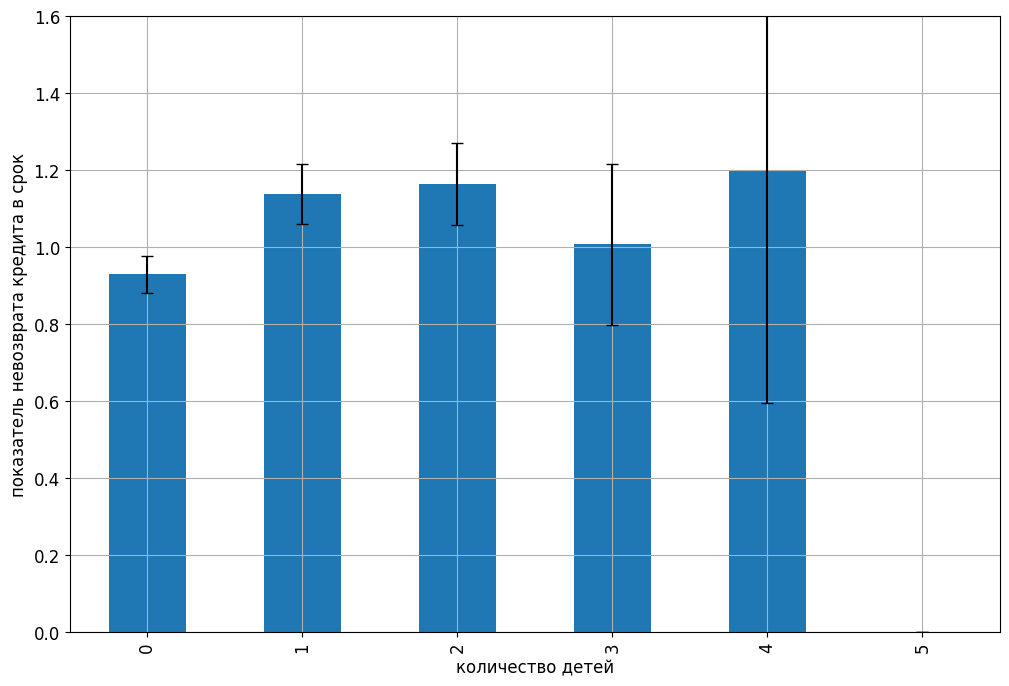

In [77]:
# строим график
plot_debt_factor(data, 'children', ymax=1.6)

В выборке из более чем 20000 клиентов оказалось всего 41 с 4 детьми и 9 с 5 детьми. Из-за этого погрешность расчёта метрики для значений количества детей 4 и 5 будет велика, поскольку велико влияние отдельного случая на результат. Поэтому при сопоставлении значений, полученных в результате расчёта, нужно принимать во внимание не только сам результат, но и его погрешность.

Из результатов расчёта следует, что показатель невозврата кредита в срок составляет 0,93 для клиентов без детей. Это значение меньше 1, следовательно, вероятность невозврата кредита в срок для бездетных клиентов меньше, чем в среднем по всей выборке. Таким образом, отсутствие детей положительно влияет на возврат кредита в срок.

Для клиентов с 1 и 2 детьми показатель невозврата кредита в срок превышает 1 (значения 1,14 и 1,16 соответственно), следовательно, вероятность невозврата кредита в срок для бездетных клиентов больше, чем в среднем по всей выборке. Поэтому наличие 1 или 2 детей отрицательно влияет на возврат кредита в срок. 

Также видна закономерность, что показатель невозврата возрастает с увеличением количества детей от 0 до 2.

Для клиентов с 3 детьми получается большая погрешность результата расчёта метрики, поэтому сделать вывод о том, больше или меньше 1 показатель невозврата, невозможно. 

Для клиентов с 4 детьми показатель невозврата кредита в срок получился больше 1, однако из-за большой погрешности результата расчёта метрики нижняя граница возможного значения метрики с учётом погрешности меньше 1. Поэтому вывод  о том, что наличие 4 детей отрицательно влияет на возврат кредита в срок, будет не обоснованным. Ведь если в выборке появится хотя бы ещё один клиент с 4 детьми, не имевший задолженности по возврату кредита, то показатель невозврата станет меньше 1, и вывод изменится на противоположный.

Клиентов с 5 детьми в выборке слишком мало. Поэтому несмотря на то, что все 9 клиентов с 5 детьми не имели задолженности по возврату кредита, сделать уверенный вывод о том, что наличие 5 детей положительно влияет на возврат кредита в срок, также не представляется возможным.

**Вывод** 

В результате анализа установлено наличие зависимости между количеством детей и возвратом кредита в срок: 
- Отсутствие детей у заёмщика положительно влияет на возврат кредита в срок.
- Наличие 1 или 2 детей отрицательно влияет на возврат кредита в срок.
- C увеличением количества детей от 0 до 2 доля должников растёт, а значит вероятность возврата кредита в срок снижается.
- Сделать достоверный вывод о характере влияния на возврат кредита в срок наличия 3, 4 или 5 детей невозможно из-за высокой погрешности вследствие малого числа клиентов с таким количеством детей.

Возможное объяснение обнаруженной зависимости - заёмщики с детьми чаще сталкиваются с финансовыми трудностями вследствие наличия дополнительных расходов на их содержание.

### Исследование зависимости между семейным положением и возвратом кредита в срок

Выясним, есть ли зависимость между семейным положением клиента и возвратом кредита в срок. Для этого подсчитаем значение метрики с учётом погрешности в зависимости от семейного положения клиента.

In [78]:
# выводим таблицу с результатами расчёта метрики
table_debt_factor(data, 'family_status', precision=2)

,Количество клиентов,Количество должников,Доля должников (%),Показатель невозврата (ниж.граница),Показатель невозврата,Показатель невозврата (верх.граница)
Семейное положение,,,,,,
Не женат / не замужем,2796,273,9.76,1.11,1.20,1.30
в разводе,1189,84,7.06,0.76,0.87,0.98
вдовец / вдова,951,63,6.62,0.70,0.82,0.93
гражданский брак,4134,385,9.31,1.06,1.15,1.23
женат / замужем,12261,927,7.56,0.88,0.93,0.98


Для наглядного представления результатов построим график зависимости показателя невозврата кредита в срок от семейного положения заёмщика. На графике для каждого рассчитанного значения также показана его погрешность.

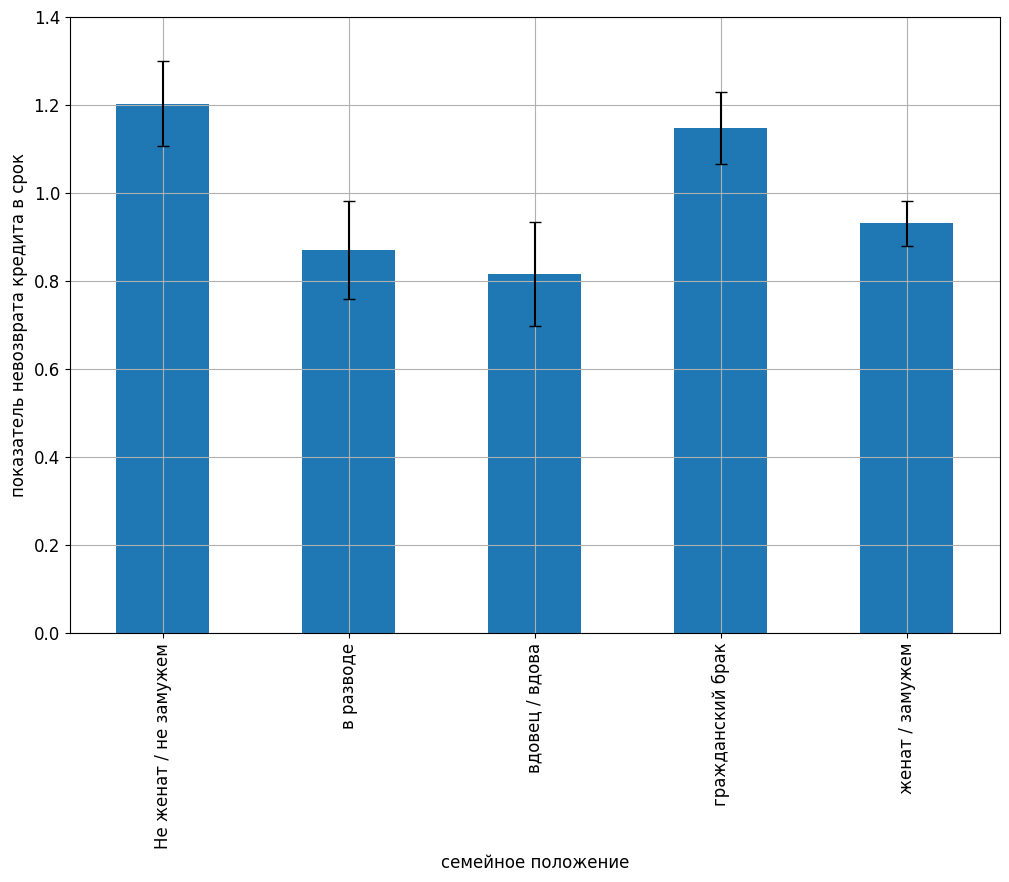

In [79]:
# строим график
plot_debt_factor(data, 'family_status', ymax=1.4)

Поскольку в каждую категорию по семейному положению попадает достаточно большое число клиентов, то погрешности расчёта метрики в данном случае малы, поэтому все полученные значения можно обоснованно сравнивать между собой.

Из результатов расчёта следует, что клиенты, состоящие либо состоявшие ранее в зарегистрированном браке, имеют вероятность невозврата кредита в срок меньшую, чем в среднем по всей выборке. 

А для клиентов, не состоящих в браке либо состоящих в гражданском браке, наоборот, вероятность невозврата кредита в срок выше, чем в среднем по всей выборке.

**Вывод**

В результате анализа установлено наличие зависимости между семейным положением и возвратом кредита в срок: 

- Наличие зарегистрированного брака в биографии клиента положительно влияет на возврат кредита в срок, а отсутствие - отрицательно.

Возможное объяснение обнаруженной зависимости - клиенты, не вступившие в брак, чаще имеют нестабильный доход, из-за чего возникает задолженность по кредиту.

### Исследование зависимости между уровнем дохода и возвратом кредита в срок

Выясним, есть ли зависимость между уровнем дохода клиента и возвратом кредита в срок. Для этого подсчитаем значение метрики с учётом погрешности в зависимости от категории уровня дохода клиента.

In [80]:
# выводим таблицу с результатами расчёта метрики
table_debt_factor(data, 'total_income_category', precision=2)

,Количество клиентов,Количество должников,Доля должников (%),Показатель невозврата (ниж.граница),Показатель невозврата,Показатель невозврата (верх.граница)
Категория уровня дохода,,,,,,
A,25,2,8.00,0.28,0.99,1.69
B,5014,354,7.06,0.80,0.87,0.93
C,15921,1353,8.50,1.00,1.05,1.10
D,349,21,6.02,0.57,0.74,0.92
E,22,2,9.09,0.32,1.12,1.92


Для наглядного представления результатов построим график зависимости показателя невозврата кредита в срок от уровня дохода заёмщика. На графике для каждого рассчитанного значения также показана его погрешность.

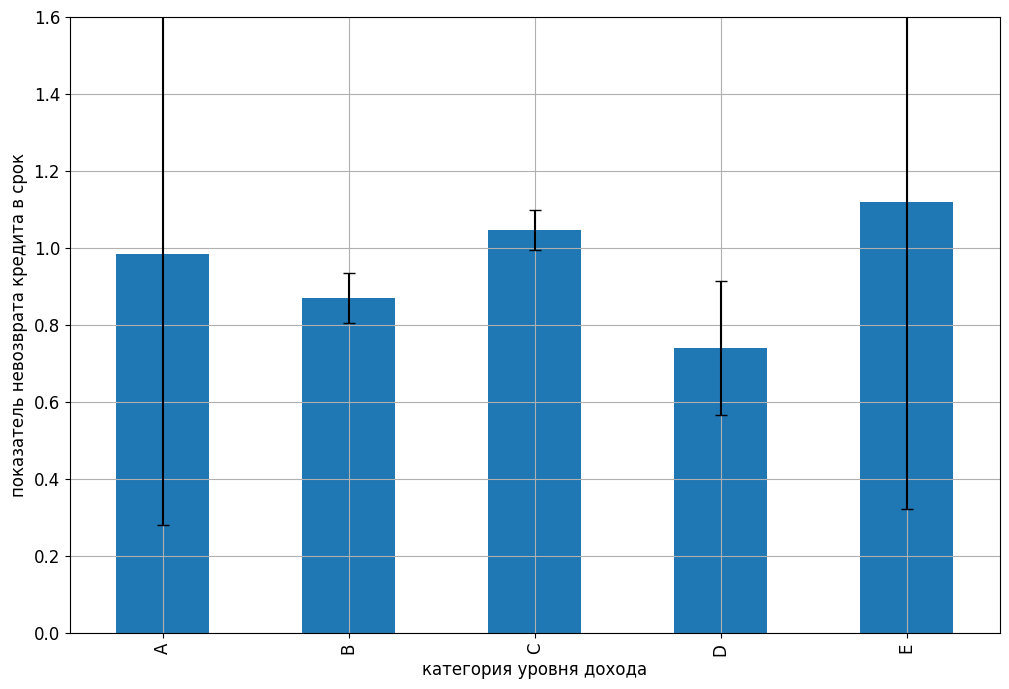

In [81]:
# строим график
plot_debt_factor(data, 'total_income_category', ymax=1.6)

В выборке мало клиентов с очень низкими (категория E) и с очень высокими доходами (категория A) - 22 и 25 соответственно (из более чем 20000). Из-за этого погрешность расчёта метрики для этих категорий будет велика, поскольку велико влияние отдельного случая на результат. По результатам расчёта показатель невозврата кредита в срок для категорий A и E с учётом погрешности соответствует значению для прочих категорий, поэтому сделать определённый вывод о зависимости между уровнем дохода и возвратом кредита в срок для этих двух категорий не представляется возможным.

Принадлежность к категории B положительно влияет на возврат кредита в срок, а принадлежность к категории C практически не влияет (показатель невозврата близок к 1) . 

Как это не странно, для категории D показатель невозврата ниже среднего по выборке. Однако число клиентов категории D сильно меньше, чем поэтому для того, чтобы сделать надёжный вывод, данных недостаточно. 

Если сравнивать две категории B и C, в которые попадает большинство клиентов, то наблюдается логичная зависимость: чем больше доход клиента, тем меньше вероятность невозврата кредита в срок.

**Вывод**

В результате анализа установлено наличие зависимости между уровнем дохода и фактом возврата кредита в срок:
- Высокий уровень дохода (категория B) положительно влияет на возврат кредита в срок.
- Вероятность невозврата кредита в срок меньше для клиентов с высокими доходами категории B, чем для клиентов категории C, имеющих средние доходы. Другими словами, в категории B доля должников меньше, чем в категории C.
- Для клиентов с низкими доходами (категория D) вероятность невозврата кредита в срок по результатам расчёта оказалась минимальной, однако из-за большой погрешности сделать надёжный вывод затруднительно.
- Для клиентов с очень высокими (категория A) и очень низкими (категория E) доходами однозначного вывода о влиянии уровня дохода на возврат кредита в срок сделать невозможно по причине очень малого количества таких клиентов в выборке.

Обнаруженное соотношение между категориями B и С вполне логично: чем больше доход клиента, тем меньше  вероятность невозврата кредита в срок (доля должников).

### Исследование влияния цели кредита на его возврат в срок

Выясним, как разные цели кредита влияют на его возврат в срок. Для этого подсчитаем значение метрики с учётом погрешности в зависимости от категории цели получения кредита.

In [82]:
# выводим таблицу с результатами расчёта метрики
table_debt_factor(data, 'purpose_category', precision=2)

,Количество клиентов,Количество должников,Доля должников (%),Показатель невозврата (ниж.граница),Показатель невозврата,Показатель невозврата (верх.граница)
Категория цели получения кредита,,,,,,
нет категории,1232,96,7.79,0.84,0.96,1.08
операции с автомобилем,4279,400,9.35,1.07,1.15,1.23
операции с недвижимостью,10751,780,7.26,0.84,0.89,0.94
получение образования,3546,337,9.50,1.08,1.17,1.26
проведение свадьбы,1523,119,7.81,0.86,0.96,1.07


Для наглядного представления результатов построим график зависимости показателя невозврата кредита в срок от категории цели получения кредита. На графике для каждого рассчитанного значения также показана его погрешность.

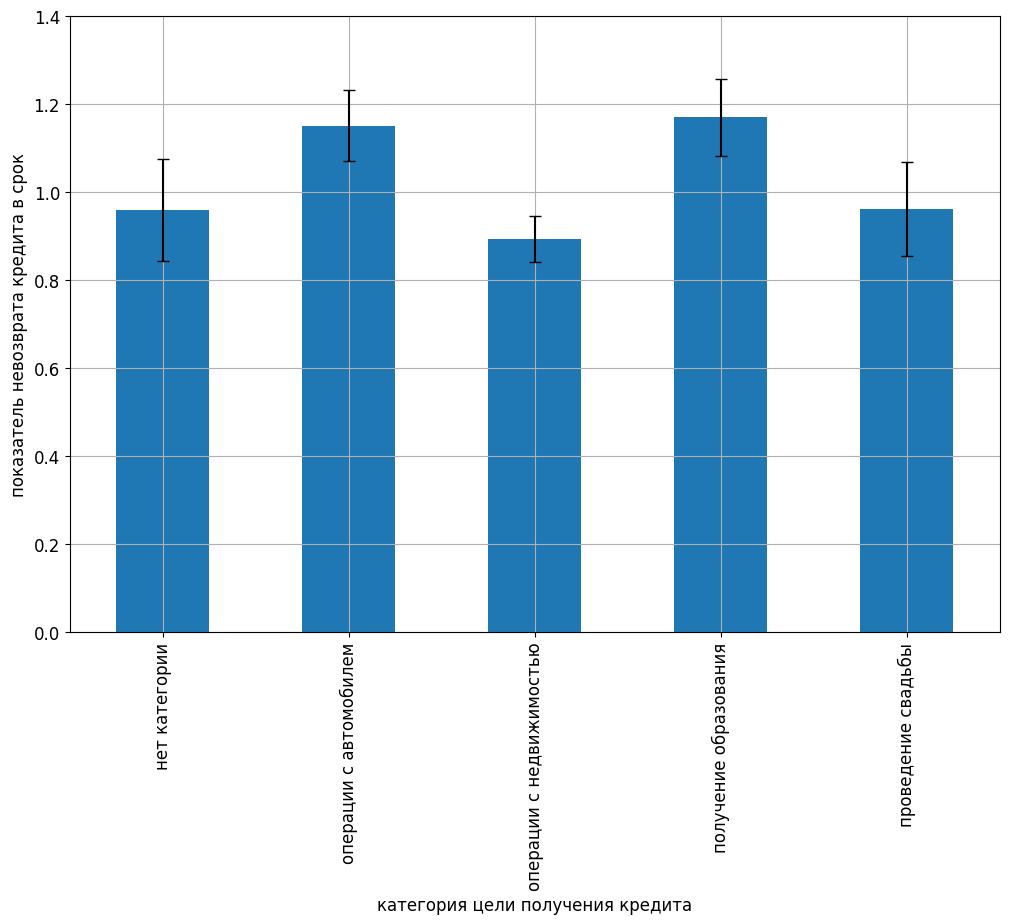

In [83]:
# строим график
plot_debt_factor(data, 'purpose_category', ymax=1.4)

Поскольку в каждую категорию по цели получения кредита попадает достаточно большое число клиентов, то погрешности расчёта метрики в данном случае малы, поэтому все полученные значения можно обоснованно сравнивать между собой.

Из результатов расчёта следует, что показатель невозврата кредита в срок минимален (значение 0,89) и меньше 1, если цель получения кредита - операции с недвижимостью. 

Для кредитов, взятых на проведение свадьбы, показатель невозврата в срок немного выше (значение 0,97) и с учётом погрешности неотличимо от 1.

Для кредитов, цель получения которых - операции с автомобилем и получение образования, показатель невозврата кредита в срок заметно выше - 1,15 и 1,14 соответственно.

**Вывод**

В результате анализа обнаружено влияние цели получения кредита на его возврат в срок:
- Если цель получения кредита связана с операциями с недвижимостью, то это положительно влияет на его возврат в срок.
- Цель получения кредита "проведение свадьбы" практически не влияет на его возврат в срок.
- Цели получения кредита, связанные с операциями с автомобилем и получением образования, влияют на его возврат в срок отрицательно.

Возможное объяснение обнаруженной зависимости - операции с недвижимостью и свадьбу, как правило, проводят при стабильном финансовом положении. 

### Дополнительный анализ

Дополнительно исследуем, есть ли зависимость между возвратом кредита в срок и другими признаками клиентов, сведения о которых есть в данных:
- `education` — уровень образования
- `gender` — пол клиента
- `income_type` — тип занятости

#### Зависимость от уровня образования

Исследуем зависимость от уровня образования.

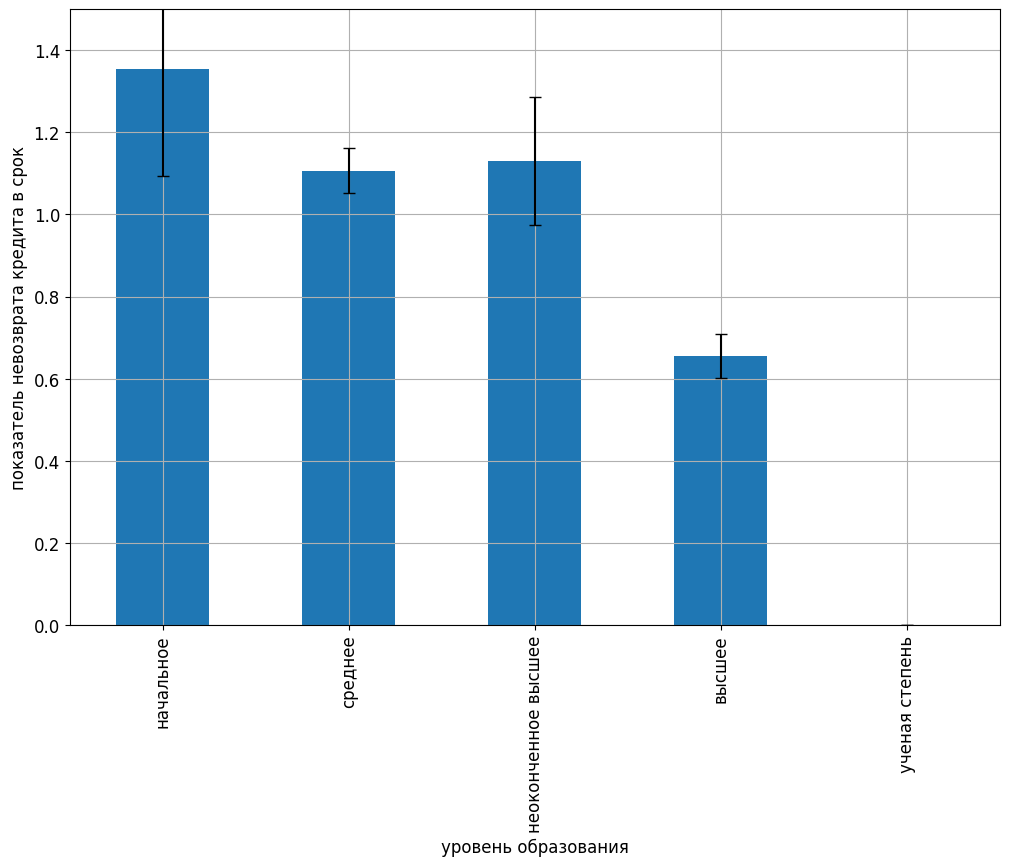

In [84]:
# строим график
plot_debt_factor(data, 'education', ymax=1.5)

**Вывод:**

- Вероятность невозврата кредита в срок имеет тенденцию к уменьшению с ростом уровня образования.

- Наличие высшего образования - существенный фактор, положительно влияющий на возврат кредита в срок.

#### Зависимость от пола

Посмотрим также на соотношение вероятности невозврата кредита в срок между полами.

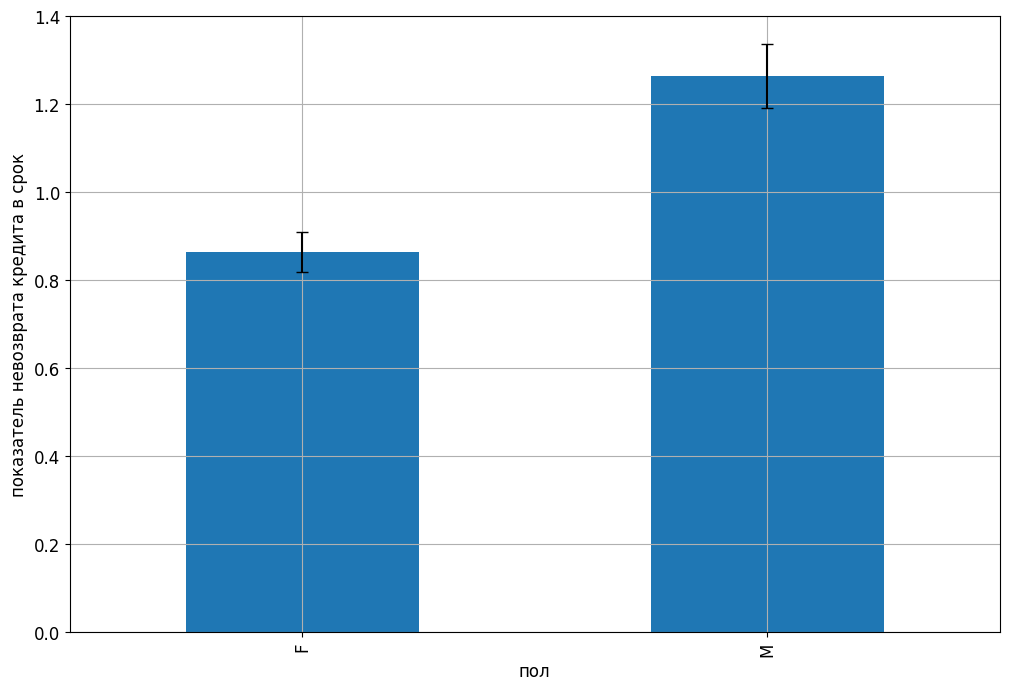

In [85]:
# убираем из таблицы строки с аномальным значением пола и
# строим график
plot_debt_factor(data[data['gender'] != 'XNA'], 'gender', ymax=1.4)

**Вывод:**

Вероятность невозврата кредита в срок выше для мужчин, чем для женщин.

#### Зависимость от типа занятости

Исследуем, как в целом тип занятости влияет на возврат кредита.

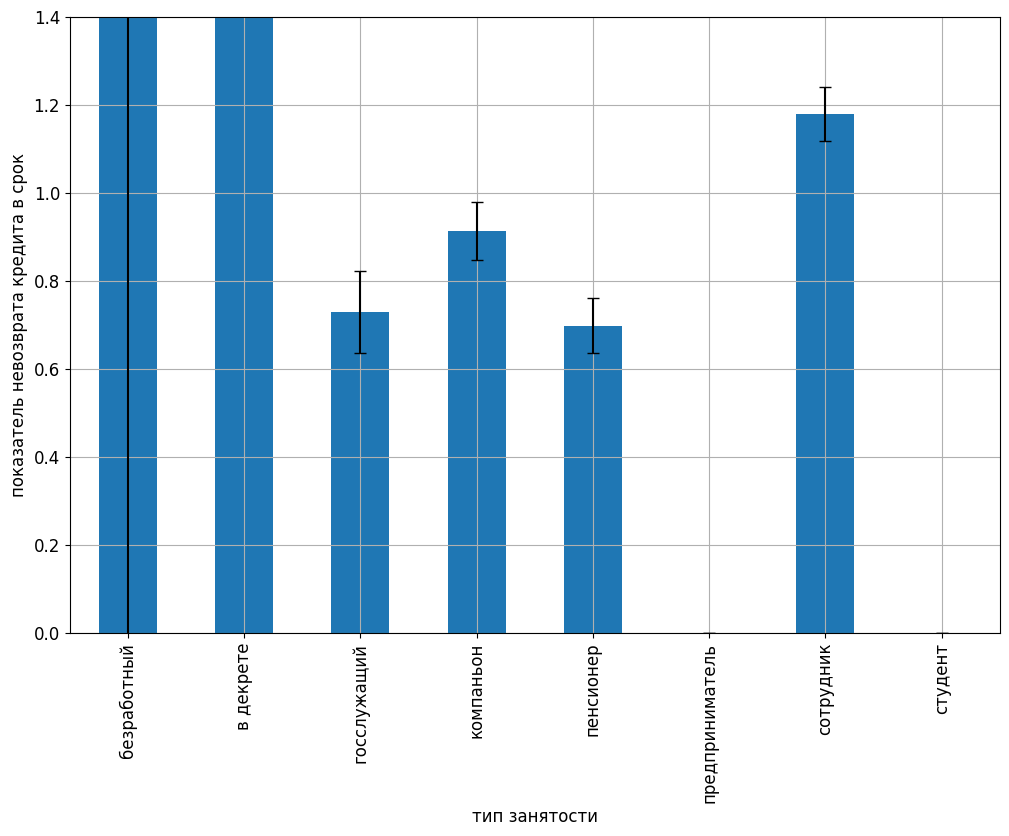

In [86]:
# строим график
plot_debt_factor(data, 'income_type', ymax=1.4)

**Вывод:**

Статус пенсионера, госслужащего и, в меньшей степени, компаньона положительно влияет на возврат кредита в срок.

## Общий вывод

1. **На этапе предобработки** были выявлены и по возможности устранены проблемы в данных - аномалии, пропуски, дубликаты. Также выполнено преобразование типов данных и проведена категоризация по значимым признакам.
   - Устранены аномальные отрицательные значения трудового стажа. Однако для двух категорий клиентов (безработные и пенсионеры) значения стажа аномально большие и поэтому недостоверные. Это нужно учитывать при дальнейшей работе с данными.
   - Удалены строки с аномальными значениями количества детей.
   - Удалены строки-дубликаты в таблице. Они не несут полезной информации.
   - Устранены неявные дубликаты  значений уровня образования. Для устранения неявных дубликатов строковых значений использован метод их приведения их к нижнему регистру.
   - Устранены пропуски значений трудового стажа  и значений ежемесячного дохода. Пропуски заполнены медианными значениями по категориям типа занятости, поскольку этот фактор оказывает наибольшее влияние на значения данных величин.
   - Неявные пропуски (значение `0`) значений возраста заполнены медианным значением по выборке.
   - Неявный пропуск значения пола (значение `'XNA'`) в одной строке таблицы оставлен как есть.
   - Тип значений ежемесячного дохода и значений трудового стажа изменён на целочисленный, который соответствует характеру данных в этих столбцах.
   - Проведена категоризация клиентов по уровню дохода. Клиенты разделены на 5 категорий (A, B, C, D, E) по убыванию ежемесячного дохода.
   - Проведена категоризация клиентов по цели получения кредита. Все кредиты разделены на 4 категории: операции с автомобилем, операции с недвижимостью, проведение свадьбы, получение образования.   
   
   Таким образом, в результате предобработки **данные подготовлены для анализа**.
   

2. В результате анализа данных **установлено наличие зависимости** между возвратом кредита в срок и следующими признаками, характеризующими заёмщика:

   - **Количество детей**. Установлено, что **отсутствие детей у заёмщика положительно влияет на возврат кредита в срок**, а наличие 1 или 2 детей влияет отрицательно, причём **доля должников растёт с увеличением количества детей** с 0 до 2. Для оценки влияния большего количества детей имеющихся данных недостаточно. Возможное объяснение обнаруженной зависимости - заёмщики с детьми чаще сталкиваются с финансовыми трудностями вследствие наличия дополнительных расходов на их содержание.

   - **Семейное положение**. Установлено, что среди клиентов, состоящих в зарегистрированном браке или состоявших ранее (разведённых либо овдовевших), доля должников меньше, чем среди не состоящих в браке либо состоящих в гражданском браке. Таким образом, **наличие зарегистрированного брака в биографии клиента положительно влияет на возврат кредита в срок**, а отсутствие - отрицательно. Возможное объяснение обнаруженной зависимости - клиенты, не вступившие в брак, чаще имеют нестабильный доход, из-за чего возникает задолженность по кредиту. Также, возможно, есть связь с возрастом.

   - **Уровень дохода**. Установлено, что в диапазоне уровня доходов категорий B и C (высокие и средние доходы) **чем выше доходы клиента, тем меньше вероятность невозврата кредита в срок**. Для клиентов с очень высокими (категория A), очень низкими (категория E) и низкими (категория D) доходами однозначного вывода о влиянии уровня дохода на возврат кредита в срок сделать невозможно по причине малого количества таких клиентов в выборке.

   - **Цель получения кредита**. Установлено, что **доля должников меньше всего для кредитов, цель получения которых - операции с недвижимостью**, то есть данная цель получения кредита влияет на его возврат в срок положительно. Возможное объяснение обнаруженной зависимости - операции с недвижимостью, как правило, проводят при стабильном финансовом положении. **Для кредитов, цель получения которых - операции с автомобилем и получение образования, доля должников заметно выше**, то есть данные цели получения кредита влияют на его возврат в срок отрицательно.
    
   Дополнительный анализ позволил выявить зависимость между возвратом кредита в срок и другими признаками клиентов, сведения о которых есть в данных:
      - **Уровень образования**. Установлено, что **наличие высшего образования - существенный фактор, положительно влияющий на возврат кредита в срок**. В целом доля должников уменьшается с ростом уровня образования. 
      - **Пол**. Установлено, что доля должников выше среди мужчин, чем среди женщин.
      - **Тип занятости**. Установлено, что статус пенсионера, госслужащего и, в меньшей степени, компаньона положительно влияет на возврат кредита в срок.

   Потенциально можно также исследовать влияние категорий по возрасту и трудовому стажу, но для этого нужно сначала устранить имеющиеся в этих данных аномалии.


3. На основании выявленной зависимости между возвратом кредита в срок и различными признаками, характеризующими заёмщика (количество детей, семейное положение, уровень дохода и цель получения кредита), можно составить портрет идеального надёжного заёмщика и его противоположности - рискованного заёмщика:
   - **Надёжный заёмщик** - это человек без детей, состоящий (либо ранее состоявший) в браке, с высоким уровнем дохода, который берёт кредит на операции с недвижимостью.
   - **Рискованный заёмщик** - это человек, у которого есть дети, не состоящий в официальном браке, с невысоким уровнем дохода, который берёт кредит на операции с автомобилем или получение образования.

   С учётом дополнительно выявленных зависимостей между между возвратом кредита в срок и уровнем образования, полом и типом занятости портреты надёжного и рискованного заёмщика можно дополнить:
   - **Надёжный заёмщик** - это замужняя женщина (или разведённая либо вдова) с высшим образованием и высоким уровнем дохода, без детей, пенсионерка или госслужащая, которая берёт кредит на операции с недвижимостью.
   - **Рискованный заёмщик** - это неженатый либо состоящий в гражданском браке мужчина трудоспособного возраста (не пенсионер) без высшего образования и с невысоким уровнем дохода, у которого есть дети, не находящийся на госслужбе, который берёт кредит на операции с автомобилем или получение образования.
   

4. По результатам анализа можно дать следующие **рекомендации** по оценке потенциальных заёмщиков:
    - При оценке способности потенциального заёмщика вернуть кредит **использовать установленные закономерности**.
    - Если потенциальный заёмщик по какому-либо признаку относится к группе, для которой влияние на возврат кредита в срок не известно, нужно использовать при оценке другой признак, для которого известно влияние значения, свойственного клиенту.
    - Лучше всего оценивать клиентов по нескольким влияющим признакам, учитывая степень влияния каждого из признаков на возврат кредита в срок.
    
    
5. Возможность оценки влияния на возврат кредита в срок некоторых значений признаков, характерных для малых групп клиентов, существенно затруднено по причине высокой погрешности результата оценки.


6. Введённая метрика (показатель невозврата кредита в срок) показывает, во сколько раз доля должников в рассматриваемой группе больше средней по всей выборке, и поэтому позволяет легко делать вывод о характере влияния конкретного значения признака на возврат кредита в срок относительно среднего уровня (положительное влияние, если значение < 1, и отрицательное, если > 1). Также просто сравнивать между собой различные признаки по степени их влияния на возврат кредита в срок.


7. Чтобы повысить точность анализа, необходимо вместо факта наличия задолженности по возврату кредитов использовать информацию о сумме долга. Ведь большая сумма задолженности по крупному кредиту важнее, чем факт возврата в срок многих мелких. 


На основании выводов можно также сформулировать следующие **рекомендации для построения модели кредитного скоринга**:
- Использовать как можно больший объём исходных статистических данных, чтобы снизить погрешность результата оценки влияния различных признаков на возврат кредита в срок.
- Повышать качество исходных данных, поскольку от него зависит возможность их использования при проведении анализа с целью выявить закономерности, которые будут положены в основу модели кредитного скоринга.
- Включить в статистику о платёжеспособности клиентов информацию о сумме выданного кредита, чтобы повысить точность оценки способности потенциального заёмщика вернуть кредит банку.